In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Diarization evaluation metrics

In [19]:
from pyannote.core import Annotation, Segment

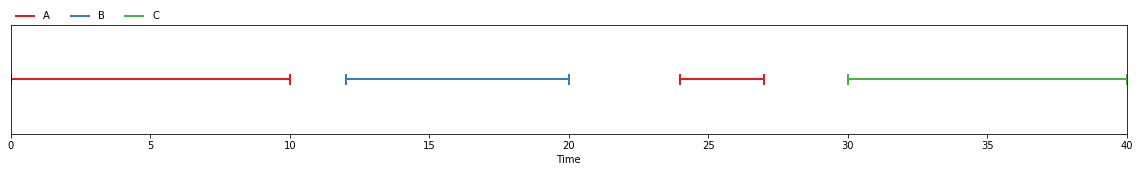

In [20]:
reference = Annotation()
reference[Segment(0, 10)] = 'A'
reference[Segment(12, 20)] = 'B'
reference[Segment(24, 27)] = 'A'
reference[Segment(30, 40)] = 'C'
reference

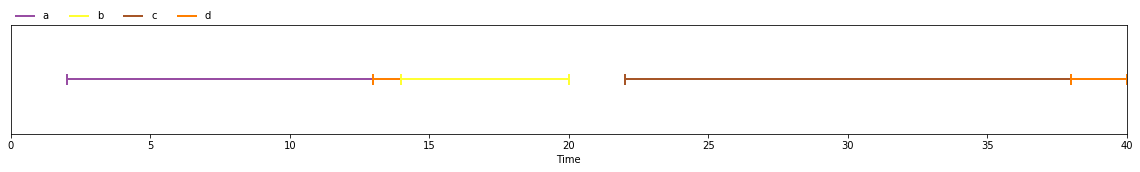

In [21]:
hypothesis = Annotation()
hypothesis[Segment(2, 13)] = 'a'
hypothesis[Segment(13, 14)] = 'd'
hypothesis[Segment(14, 20)] = 'b'
hypothesis[Segment(22, 38)] = 'c'
hypothesis[Segment(38, 40)] = 'd'
hypothesis

## Diarization error rate

In [22]:
from pyannote.metrics.diarization import DiarizationErrorRate
diarizationErrorRate = DiarizationErrorRate()
print("DER = {0:.3f}".format(diarizationErrorRate(reference, hypothesis, uem=Segment(0, 40))))

DER = 0.516


### Optimal mapping

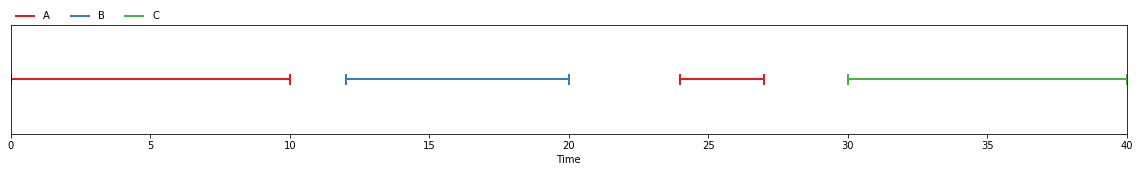

In [23]:
reference

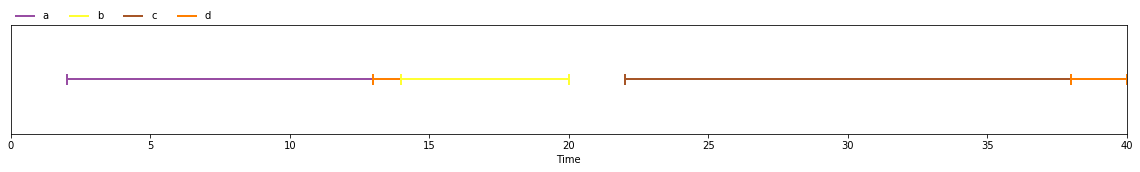

In [24]:
hypothesis

In [25]:
diarizationErrorRate.optimal_mapping(reference, hypothesis)

{'a': 'A', 'b': 'B', 'c': 'C'}

### Details

In [26]:
diarizationErrorRate(reference, hypothesis, detailed=True, uem=Segment(0, 40))

{'confusion': 7.0,
 'correct': 22.0,
 'diarization error rate': 0.5161290322580645,
 'false alarm': 7.0,
 'missed detection': 2.0,
 'total': 31.0}

## Clusters purity and coverage

In [27]:
from pyannote.metrics.diarization import DiarizationPurity
purity = DiarizationPurity()
print("Purity = {0:.3f}".format(purity(reference, hypothesis, uem=Segment(0, 40))))

Purity = 0.828


In [28]:
from pyannote.metrics.diarization import DiarizationCoverage
coverage = DiarizationCoverage()
print("Coverage = {0:.3f}".format(coverage(reference, hypothesis, uem=Segment(0, 40))))

Coverage = 0.759
